# Linear Regression and Gradient Descent

## One-Feature Linear Regression with the 'sklearn' Module

ref. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

#### Load Data

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# diabetes.data contains a list of observations for our features [['age','sex','bmi','bp',etc],['age','sex','bmi','bp',etc],...] 
# There are 422 sets of features (observations). len(diabetes.target) or len(diabetes.target)
# try: 
diabetes.data[0:4]


array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191]])

#### Note: Using numpy np.newaxis

In [28]:
A = np.array([1,2,3])
A

array([1, 2, 3])

In [34]:
A1 = A[:,np.newaxis]
A1

array([[1],
       [2],
       [3]])

#### Extract Our Third Feature As Our Single Input Feature (x) -> Split into Training and Testing Data

In [54]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
#diabetes_X = diabetes.data[all rows, flip vertical, get 3rd2 item for each observation]
diabetes_X[0:4]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501]])

In [55]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] # Last 20 items
diabetes_X_test = diabetes_X[-20:] # First 20 items

#### Get Our Training and Testing Outcome Data

In [59]:
# Split the targets into training/testing sets
diabetes_Y_train = diabetes.target[:-20]
diabetes_Y_test = diabetes.target[-20:]

#### Create the Linear Regression Object

In [57]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Train Our Line Regression Model

In [60]:
#Traing the model using our training sets
regr.fit(diabetes_X_train, diabetes_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Examine the Coefficients of our Model

Y = 152.92 + 938.24*X1

In [62]:
regr.intercept_

152.91886182616167

In [63]:
regr.coef_

array([938.23786125])

#### Let's Make Predictions on our Testing Set

In [65]:
predictions = regr.predict(diabetes_X_test)
predictions

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

#### Let's Compare Those Predictions with the Actuals

In [68]:
# These were the actual results for the input test data (diabetes_X_test)
diabetes_Y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [70]:
# Let's get the R2 score (% of variance explained by our model)
r2_score(diabetes_Y_test, predictions)

0.47257544798227125

In [73]:
# Let's get the Mean Squared Error
mean_squared_error(diabetes_Y_test, predictions)

2548.0723987259707

#### Let's Plot our Model's Predictions Against A Scatter Plot of the Actuals

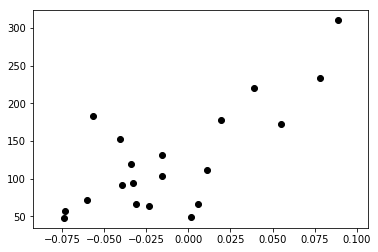

In [75]:
plt.scatter(diabetes_X_test, diabetes_Y_test, color='black')

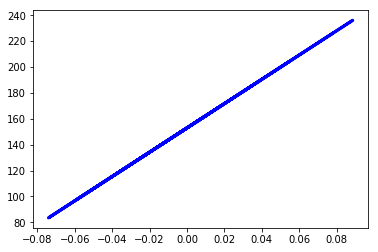

In [76]:
plt.plot(diabetes_X_test,predictions, color='blue', linewidth=3)

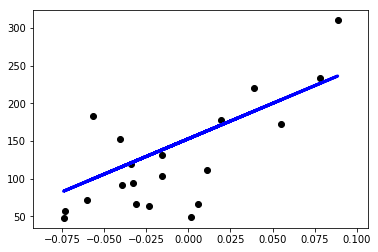

In [77]:
plt.scatter(diabetes_X_test, diabetes_Y_test, color='black')
plt.plot(diabetes_X_test,predictions, color='blue', linewidth=3)

## One-Feature Linear Regression with the 'SciPy' Module

#### Build the model

In [92]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diabetes_X_train.ravel(), diabetes_Y_train)
# np.ravel() used to convert diabetes_X_train from an n-dimesional array (ndarray) to a basic, 1-dimensional array (array)

In [94]:
slope, intercept, r_value, p_value, std_err

(938.2378612512632,
 152.91886182616167,
 0.5789052173601084,
 3.980836580232772e-39,
 64.48353026137376)

#### Let's Make Predictions on our Testing Set

In [96]:
predictions = intercept + slope*diabetes_X_test
predictions

array([[225.9732401 ],
       [115.74763374],
       [163.27610621],
       [114.73638965],
       [120.80385422],
       [158.21988574],
       [236.08568105],
       [121.81509832],
       [ 99.56772822],
       [123.83758651],
       [204.73711411],
       [ 96.53399594],
       [154.17490936],
       [130.91629517],
       [ 83.3878227 ],
       [171.36605897],
       [137.99500384],
       [137.99500384],
       [189.56845268],
       [ 84.3990668 ]])

## What is the relationship among NumPy, SciPy, StatsModels, Scikit-learn, and TensorFlow and when should I use each one of them?

ref. https://www.quora.com/What-is-the-relationship-among-NumPy-SciPy-Pandas-and-Scikit-learn-and-when-should-I-use-each-one-of-them

- **Numpy**. Adds Python support for large, multi-dimensional arrays and matrices, along with a large library of high-level mathematical functions to operate on these arrays.
- **SciPy** is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data.
- **Statsmodels** scikit-learn’s typical applications are machine-learning and data-science; StatsModels are econometrics, generalized-linear-models, timeseries-analysis, and regression-models. These topic tags reflect the conventional wisdom that scikit-learn is for machine learning and StatsModels is for complex statistics.
- **Scikit-learn** is a Python module for machine learning built on top of SciPy. Sci-kit learn gives you a plethora of different linear fitting methods, but it gives only the fitting parameters, R^2, MSE,etc only. But if you need other diagnostic values like p-values, standard errors on each of the parameters, t-tests, etc. Then either you have to write your own code or move to statsmodels (which was the reason for me to move). Moreover the syntax of statsmodels is more aligned towards that of R, so if you are an R user and want to move to python, statsmodels will be easier to learn. The biggest disadvantage of statsmodels lies in the fact that it is still a very new package. The quantity and quality of documentation available is very poor. On the other hand, scikit-learn has one most well written documentations. Scikit-learn uses a simple modular approach for all its functions (fit->transform->predict) and hence is very easy to learn and becomes very intuitive after you know the basics. It is more ‘pythonic’ than statsmodels. (ref. https://www.quora.com/What-are-the-advantages-and-disadvantages-of-using-Statsmodels-over-Scikit-learn)
- **TensorFlow** Scikit Learn and Tensorflow are both machine learning packages. Tensorflow is best for neural networks. Scikit Learn is good for everything else.
- **Pandas**. Not a statistical.machine learning package. Mainly used for its datafrae data structure. Software library written for data manipulation and analysis in Python. Offers data structures and operations for manipulating numerical tables and time series.

![alt text](Data\Numpy_SciPy_SciKitLearn.PNG "Logo Title Text 1")

